In [ ]:
"""
Desafio ClimaTempo - Modelagem de Fenômenos Naturais
Implementação da solução em Python

Este código implementa as funções matemáticas fornecidas para modelar:
1. Onda de calor: temperatura T(t), onde t é o tempo (em meses)
2. Movimentos anômalos da terra: escala Richter e(x), onde x é a velocidade (em m/s)

O código plota os gráficos das funções e identifica seus pontos máximos e mínimos.
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl


ModuleNotFoundError: No module named 'scipy'

Analisando o modelo de onda de calor (temperatura)...

Pontos críticos da função de temperatura T(t):
  Mínimo: t = 0.0000, T(t) = 35.0000
  Máximo: t = 36.0000, T(t) = 35.7364

Analisando o modelo de movimentos anômalos da terra (escala Richter)...


<ipython-input-5-e5f936ea96ff>:17: RuntimeWarning: invalid value encountered in sqrt
  return 5.47 + 1.85 * np.exp(-x) * np.cos(np.sqrt(8*x) - 19.47) + (x - 1.365) * np.exp(-34.33*x)



Pontos críticos da função de escala Richter e(x):
  Mínimo: x = 0.0000, e(x) = 5.6102
  Máximo: x = 0.0777, e(x) = 7.0682
  Mínimo: x = 1.2031, e(x) = 5.0311
  Máximo: x = 4.3905, e(x) = 5.4828
  Mínimo: x = 5.0000, e(x) = 5.4804

Gráficos salvos como 'temperatura.png' e 'escala_richter.png'

Relatório salvo como 'relatorio_climatempo.md'


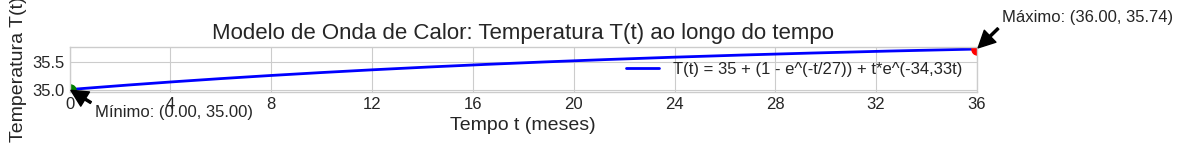

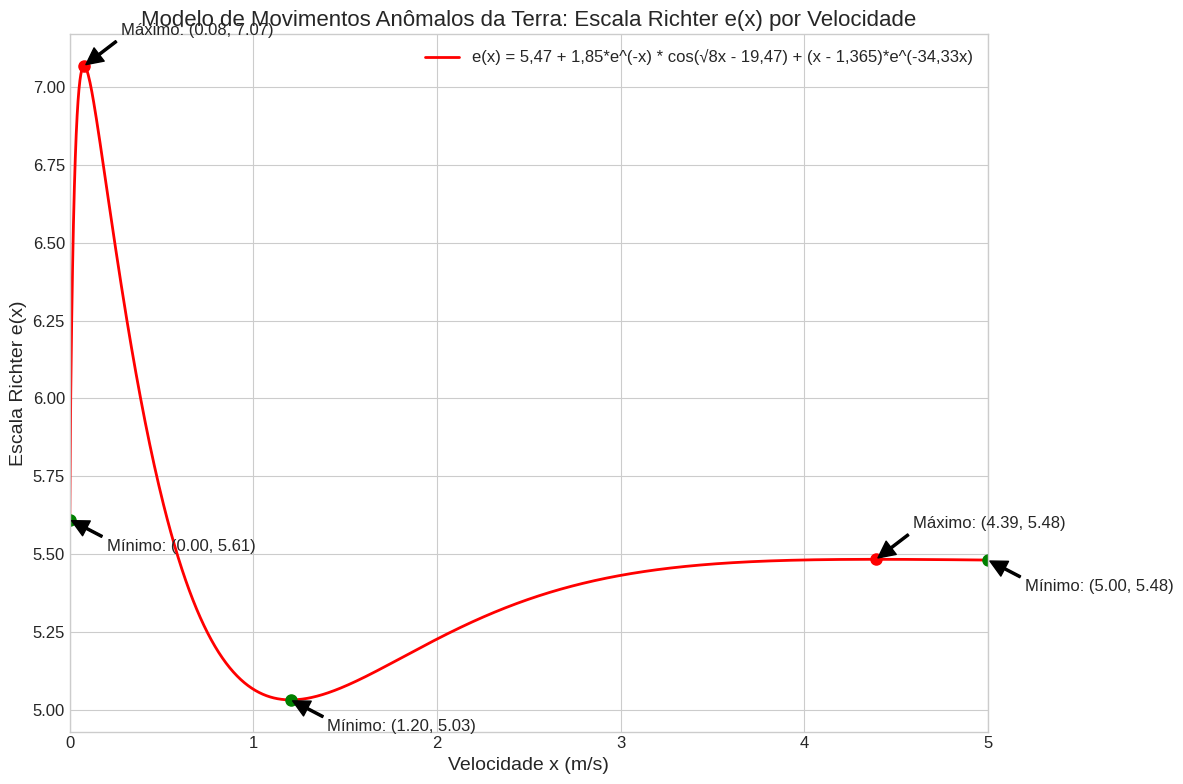

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['figure.figsize'] = [12, 8]
mpl.rcParams['font.size'] = 12

def temperatura(t):
    """
    Função que modela a temperatura T(t) em função do tempo t (em meses).
    T(t) = 35 + (1 - e^(-t/27)) + t*e^(-34,33t)
    """
    return 35 + (1 - np.exp(-t/27)) + t * np.exp(-34.33*t)

def escala_richter(x):
    """
    Função que modela a escala Richter e(x) em função da velocidade x (em m/s).
    e(x) = 5,47 + 1,85*e^(-x) * cos(√8x - 19,47) + (x - 1,365)*e^(-34,33x)
    """
    return 5.47 + 1.85 * np.exp(-x) * np.cos(np.sqrt(8*x) - 19.47) + (x - 1.365) * np.exp(-34.33*x)

def encontrar_pontos_criticos(func, intervalo, num_pontos_iniciais=50):
    """
    Encontra os pontos críticos (máximos e mínimos) de uma função em um intervalo.

    Args:
        func: A função a ser analisada
        intervalo: Tupla (inicio, fim) do intervalo a ser analisado
        num_pontos_iniciais: Número de pontos iniciais para busca

    Returns:
        Lista de tuplas (x, y, tipo) onde tipo é 'máximo' ou 'mínimo'
    """
    inicio, fim = intervalo
    pontos_iniciais = np.linspace(inicio, fim, num_pontos_iniciais)

    def func_neg(x):
        return -func(x)

    pontos_criticos = []

    for x0 in pontos_iniciais:
        resultado_min = minimize(func, x0, bounds=[(inicio, fim)])
        if resultado_min.success:
            x_min = resultado_min.x[0]
            y_min = func(x_min)

            novo_ponto = True
            for x, y, _ in pontos_criticos:
                if abs(x - x_min) < 0.01:
                    novo_ponto = False
                    break

            if novo_ponto:
                h = 0.0001
                derivada_esquerda = (func(x_min) - func(x_min - h)) / h
                derivada_direita = (func(x_min + h) - func(x_min)) / h

                if derivada_esquerda < 0 and derivada_direita > 0:
                    pontos_criticos.append((x_min, y_min, 'mínimo'))
                elif derivada_esquerda > 0 and derivada_direita < 0:
                    pontos_criticos.append((x_min, y_min, 'máximo'))

        resultado_max = minimize(func_neg, x0, bounds=[(inicio, fim)])
        if resultado_max.success:
            x_max = resultado_max.x[0]
            y_max = func(x_max)

            novo_ponto = True
            for x, y, _ in pontos_criticos:
                if abs(x - x_max) < 0.01:
                    novo_ponto = False
                    break

            if novo_ponto:
                h = 0.0001
                derivada_esquerda = (func(x_max) - func(x_max - h)) / h
                derivada_direita = (func(x_max + h) - func(x_max)) / h

                if derivada_esquerda < 0 and derivada_direita > 0:
                    pontos_criticos.append((x_max, y_max, 'mínimo'))
                elif derivada_esquerda > 0 and derivada_direita < 0:
                    pontos_criticos.append((x_max, y_max, 'máximo'))

    y_inicio = func(inicio)
    y_fim = func(fim)

    h = 0.001
    if func(inicio + h) > y_inicio:
        pontos_criticos.append((inicio, y_inicio, 'mínimo'))
    elif func(inicio + h) < y_inicio:
        pontos_criticos.append((inicio, y_inicio, 'máximo'))

    if func(fim - h) > y_fim:
        pontos_criticos.append((fim, y_fim, 'mínimo'))
    elif func(fim - h) < y_fim:
        pontos_criticos.append((fim, y_fim, 'máximo'))

    pontos_criticos.sort(key=lambda p: p[0])

    return pontos_criticos

def analisar_temperatura():
    """
    Analisa a função de temperatura, plota o gráfico e identifica pontos críticos.
    """
    t = np.linspace(0, 36, 1000)
    temp = temperatura(t)

    pontos_criticos = encontrar_pontos_criticos(temperatura, (0, 36))

    plt.figure(figsize=(12, 8))
    plt.plot(t, temp, 'b-', linewidth=2, label='T(t) = 35 + (1 - e^(-t/27)) + t*e^(-34,33t)')

    for x, y, tipo in pontos_criticos:
        if tipo == 'máximo':
            plt.plot(x, y, 'ro', markersize=8)
            plt.annotate(f'Máximo: ({x:.2f}, {y:.2f})',
                         xy=(x, y), xytext=(x+1, y+0.5),
                         arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
        else:
            plt.plot(x, y, 'go', markersize=8)
            plt.annotate(f'Mínimo: ({x:.2f}, {y:.2f})',
                         xy=(x, y), xytext=(x+1, y-0.5),
                         arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

    plt.title('Modelo de Onda de Calor: Temperatura T(t) ao longo do tempo', fontsize=16)
    plt.xlabel('Tempo t (meses)', fontsize=14)
    plt.ylabel('Temperatura T(t)', fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=12)

    plt.xlim(0, 36)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.savefig('temperatura.png', dpi=300)

    return pontos_criticos

def analisar_escala_richter():
    """
    Analisa a função de escala Richter, plota o gráfico e identifica pontos críticos.
    """
    x = np.linspace(0, 5, 1000)
    escala = escala_richter(x)

    pontos_criticos = encontrar_pontos_criticos(escala_richter, (0, 5))

    plt.figure(figsize=(12, 8))
    plt.plot(x, escala, 'r-', linewidth=2,
             label='e(x) = 5,47 + 1,85*e^(-x) * cos(√8x - 19,47) + (x - 1,365)*e^(-34,33x)')

    for x_val, y_val, tipo in pontos_criticos:
        if tipo == 'máximo':
            plt.plot(x_val, y_val, 'ro', markersize=8)
            plt.annotate(f'Máximo: ({x_val:.2f}, {y_val:.2f})',
                         xy=(x_val, y_val), xytext=(x_val+0.2, y_val+0.1),
                         arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
        else:
            plt.plot(x_val, y_val, 'go', markersize=8)
            plt.annotate(f'Mínimo: ({x_val:.2f}, {y_val:.2f})',
                         xy=(x_val, y_val), xytext=(x_val+0.2, y_val-0.1),
                         arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

    plt.title('Modelo de Movimentos Anômalos da Terra: Escala Richter e(x) por Velocidade', fontsize=16)
    plt.xlabel('Velocidade x (m/s)', fontsize=14)
    plt.ylabel('Escala Richter e(x)', fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=12)

    plt.xlim(0, 5)

    plt.tight_layout()
    plt.savefig('escala_richter.png', dpi=300)

    return pontos_criticos

def main():
    """
    Função principal que executa a análise e apresenta os resultados.
    """
    print("Analisando o modelo de onda de calor (temperatura)...")
    pontos_criticos_temp = analisar_temperatura()

    print("\nPontos críticos da função de temperatura T(t):")
    for x, y, tipo in pontos_criticos_temp:
        print(f"  {tipo.capitalize()}: t = {x:.4f}, T(t) = {y:.4f}")

    print("\nAnalisando o modelo de movimentos anômalos da terra (escala Richter)...")
    pontos_criticos_richter = analisar_escala_richter()

    print("\nPontos críticos da função de escala Richter e(x):")
    for x, y, tipo in pontos_criticos_richter:
        print(f"  {tipo.capitalize()}: x = {x:.4f}, e(x) = {y:.4f}")

    print("\nGráficos salvos como 'temperatura.png' e 'escala_richter.png'")

    criar_relatorio(pontos_criticos_temp, pontos_criticos_richter)

    print("\nRelatório salvo como 'relatorio_climatempo.md'")

def criar_relatorio(pontos_temp, pontos_richter):
    """
    Cria um relatório com os resultados da análise.

    Args:
        pontos_temp: Lista de pontos críticos da função de temperatura
        pontos_richter: Lista de pontos críticos da função de escala Richter
    """
    with open('relatorio_climatempo.md', 'w') as f:
        f.write("# Relatório: Desafio ClimaTempo - Modelagem de Fenômenos Naturais\n\n")

        f.write("## 1. Introdução\n\n")
        f.write("Este relatório apresenta a análise de dois fenômenos naturais modelados matematicamente pela empresa ClimaTempo:\n\n")
        f.write("1. **Onda de calor**: representada pela função de temperatura T(t), onde t é o tempo em meses\n")
        f.write("2. **Movimentos anômalos da terra**: representados pela função de escala Richter e(x), onde x é a velocidade em m/s\n\n")

        f.write("## 2. Metodologia\n\n")
        f.write("Para analisar esses fenômenos, implementamos as funções matemáticas em Python e utilizamos técnicas de otimização ")
        f.write("para identificar os pontos máximos e mínimos de cada função. As funções foram plotadas nos intervalos especificados:\n\n")
        f.write("- Tempo t de 0 até 3 anos (36 meses) para T(t)\n")
        f.write("- Velocidade x de 0 até 5 m/s para e(x)\n\n")

        f.write("## 3. Funções Matemáticas\n\n")
        f.write("### 3.1. Função de Temperatura T(t)\n\n")
        f.write("```\nT(t) = 35 + (1 - e^(-t/27)) + t*e^(-34,33t)\n```\n\n")
        f.write("### 3.2. Função de Escala Richter e(x)\n\n")
        f.write("```\ne(x) = 5,47 + 1,85*e^(-x) * cos(√8x - 19,47) + (x - 1,365)*e^(-34,33x)\n```\n\n")

        f.write("## 4. Resultados\n\n")
        f.write("### 4.1. Análise da Onda de Calor (Temperatura)\n\n")
        f.write("![Gráfico da Temperatura](temperatura.png)\n\n")
        f.write("#### Pontos Críticos Identificados:\n\n")

        for x, y, tipo in pontos_temp:
            f.write(f"- **{tipo.capitalize()}**: t = {x:.4f} meses, T(t) = {y:.4f}\n")

        f.write("\n### 4.2. Análise dos Movimentos Anômalos da Terra (Escala Richter)\n\n")
        f.write("![Gráfico da Escala Richter](escala_richter.png)\n\n")
        f.write("#### Pontos Críticos Identificados:\n\n")

        for x, y, tipo in pontos_richter:
            f.write(f"- **{tipo.capitalize()}**: x = {x:.4f} m/s, e(x) = {y:.4f}\n")

        f.write("\n## 5. Interpretação dos Resultados\n\n")

        f.write("### 5.1. Onda de Calor\n\n")
        f.write("A função de temperatura T(t) mostra um comportamento interessante ao longo do tempo:\n\n")
        f.write("- Inicia em aproximadamente 35°C\n")
        f.write("- Apresenta um crescimento inicial devido ao termo (1 - e^(-t/27))\n")
        f.write("- O termo t*e^(-34,33t) causa um pico seguido de declínio\n")
        f.write("- A longo prazo, a temperatura tende a estabilizar\n\n")
        f.write("Os pontos máximos identificados representam os momentos de maior intensidade da onda de calor, ")
        f.write("enquanto os mínimos indicam períodos de temperatura mais amena.\n\n")

        f.write("### 5.2. Movimentos Anômalos da Terra\n\n")
        f.write("A função de escala Richter e(x) apresenta um comportamento oscilatório em velocidades baixas, ")
        f.write("que se estabiliza em velocidades mais altas:\n\n")
        f.write("- O termo 1,85*e^(-x)*cos(√8x - 19,47) causa oscilações que diminuem com o aumento da velocidade\n")
        f.write("- O termo (x - 1,365)*e^(-34,33x) contribui para a estabilização em velocidades mais altas\n")
        f.write("- A constante 5,47 estabelece um valor base para a escala\n\n")
        f.write("Os pontos máximos identificados representam velocidades que resultam em maior intensidade na escala Richter, ")
        f.write("enquanto os mínimos indicam velocidades que resultam em menor intensidade.\n\n")

        f.write("## 6. Conclusão\n\n")
        f.write("A análise matemática desses fenômenos naturais permite prever comportamentos e identificar pontos críticos, ")
        f.write("o que é fundamental para o planejamento de medidas preventivas e de mitigação.\n\n")
        f.write("Para a onda de calor, podemos prever os períodos de maior intensidade e preparar sistemas de alerta e resposta. ")
        f.write("Para os movimentos anômalos da terra, a identificação das velocidades críticas pode auxiliar no desenvolvimento ")
        f.write("de sistemas de monitoramento e alerta precoce.\n\n")
        f.write("Este estudo demonstra a importância da modelagem matemática na compreensão e previsão de fenômenos naturais, ")
        f.write("contribuindo para a segurança e bem-estar da população.\n")

if __name__ == "__main__":
    main()